# 9. Hafta Lab-5: Gaussian Anomaly Detection
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak
Bu lab çalışması kapsamında anomali tespit yöntemi kullanılacaktır.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Normal dağılımın olasılık yoğunluk fonksiyonu (Probability Density Function - PDF)

In [2]:
def normal(power, mean, std, val):
    a = 1/(np.sqrt(2*np.pi)*(std))
    diff = np.abs(np.power(val-mean, power))
    b = np.exp(-(diff)/(2*std*std))
    return a*b

### Normal dağılım gösteren bir veri kümesi oluşturalım

In [3]:
mu, sigma = 0, 0.05 # mean and standard deviation
sample_size = 100000
X = np.array((np.random.normal(mu, sigma, sample_size), np.random.normal(mu, sigma, sample_size))).T
X

array([[-0.03478317, -0.00277907],
       [ 0.0021598 , -0.01336078],
       [ 0.113935  , -0.02265317],
       ...,
       [ 0.03213728, -0.05301686],
       [-0.06642834, -0.05604556],
       [-0.01684518, -0.01094363]])

### Ortalama ve standart sapma değerlerini her bir nitelik için hesaplayalım.

In [4]:
x_mean = np.mean(X, axis=0)
x_sigma = np.std(X, axis=0)
x_pdf = np.zeros(sample_size)


### Veri kümesi

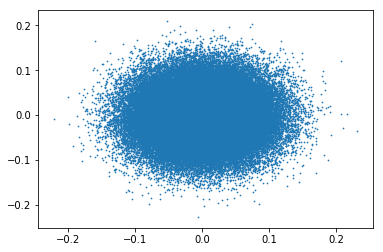

In [5]:
plt.scatter(X[:,0],X[:,1],s=0.5)

### Veri kümesinde bulunan her bir örneğin pdf değerini hesaplayalım.
$\prod_{j=1}^np(x_j;\mu_j,\sigma_j^2)$

In [6]:
for i in range(sample_size):
    p = normal(2,x_mean[0],x_sigma[0],X[i,0])
    p = p*normal(2,x_mean[1],x_sigma[1],X[i,1])
    x_pdf[i] = p

### Eşik değeri olarak 2 seçelim ve 2'den az olan satırların index vektörünü bulalım.

In [7]:
idx = np.where(x_pdf<0.7)[0]

Bu değerlere sahip olan örnekleri marker $\times$ olacak şekilde gösterelim.

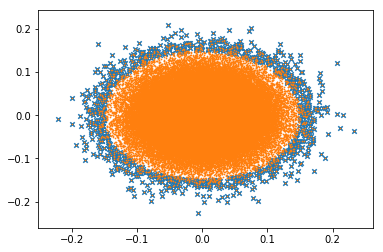

In [8]:
plt.scatter(X[idx,0],X[idx,1],marker='x',s=20)
plt.scatter(X[:,0],X[:,1],s=0.5)